# **LOADING THE DATASET**

In [ ]:
import zipfile
import os

def unzip_dataset(zip_file_path, extract_to_dir):
    """
    Unzips a dataset.

    Parameters:
    - zip_file_path (str): Path to the zip file.
    - extract_to_dir (str): Directory to extract the contents to.
    """
    # Check if the zip file exists
    if not os.path.isfile(zip_file_path):
        print(f"File {zip_file_path} does not exist.")
        return

    # Create the directory to extract files if it does not exist
    if not os.path.exists(extract_to_dir):
        os.makedirs(extract_to_dir)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents
        zip_ref.extractall(extract_to_dir)
        print(f"Extracted all files to {extract_to_dir}")

# Example usage
zip_file_path = '/content/climate change prediction.zip'  # Replace with your zip file path
extract_to_dir = 'extracted'  # Replace with your extract directory

unzip_dataset(zip_file_path, extract_to_dir)


File /content/climate change prediction.zip does not exist.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/extracted/climate_change_data.csv')


In [ ]:
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


# **DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

CONVERTING Date COLUMN INTO PROPER FORMATE

In [ ]:
# Convert to datetime with full information
df['Date'] = pd.to_datetime(df['Date'])

# Format the date column to display only the date in '%Y-%m-%d' format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


SORTING THE VALUES OF ALL THE ATTRIBUTES

In [ ]:
# Sorting each column individually
sorted_df = pd.DataFrame()
sorted_df['Date'] = df['Date']
for column in df.columns[1:]:
    sorted_df[column] = sorted(df[column])

In [ ]:
df=sorted_df

In [ ]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,Aaronberg,Afghanistan,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
1,2000-01-01,Aaronborough,Afghanistan,-3.709565,222.104943,-4.016462,0.013433,0.024785,0.003668
2,2000-01-02,Aaronchester,Afghanistan,-2.921056,226.370250,-3.760695,0.015258,0.028698,0.004213
3,2000-01-03,Aaronfort,Afghanistan,-2.487518,239.630431,-3.420128,0.019437,0.034293,0.004526
4,2000-01-04,Aaronfort,Afghanistan,-2.338728,241.219695,-3.390989,0.034380,0.054057,0.012516


In [ ]:
# Drop the 'Location' and 'Country' columns
df = df.drop(['Location', 'Country'], axis=1)

CHECKING NULL VALUES

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

null_counts

Date              0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

STATISTICAL DESCRIPITION

In [ ]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


OUTLIER ANALYSIS

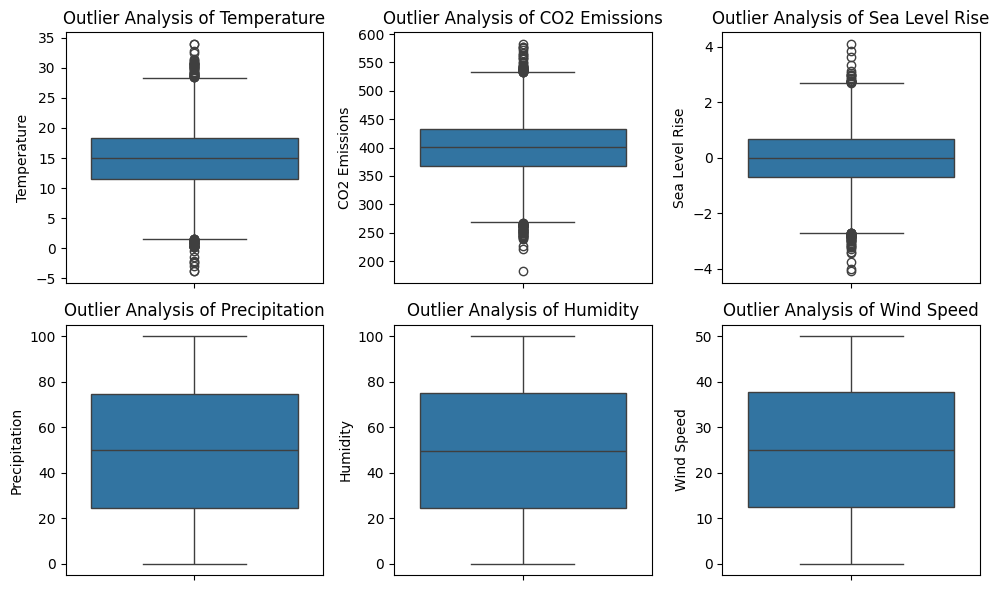

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier Analysis of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


REMOVING THE OUTLIERS

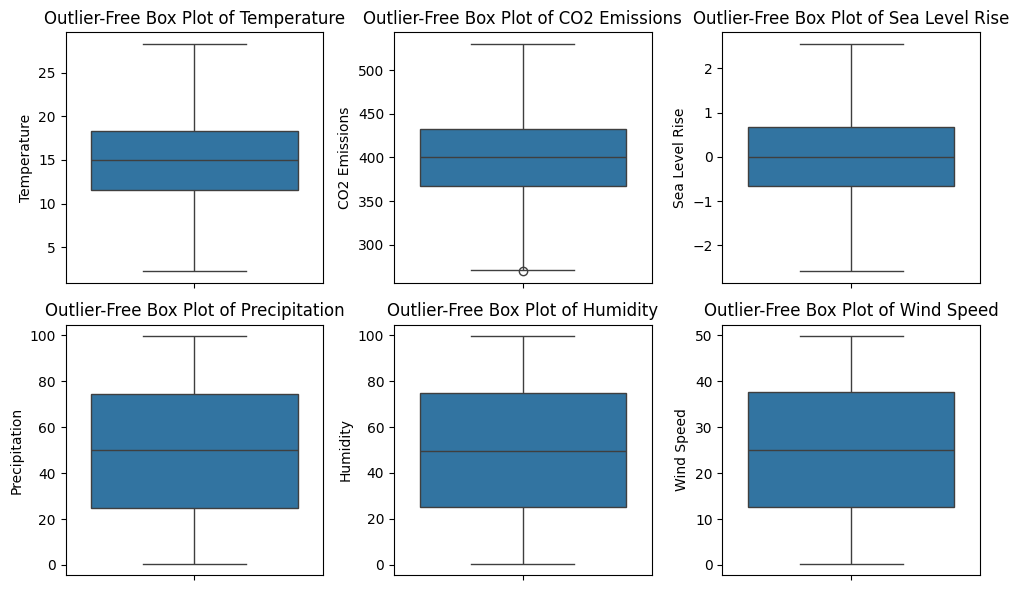

In [ ]:
# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from the DataFrame
df = remove_outliers(df, columns_to_check)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot for the cleaned data
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier-Free Box Plot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


TIME SERISE RELATIONSHIP

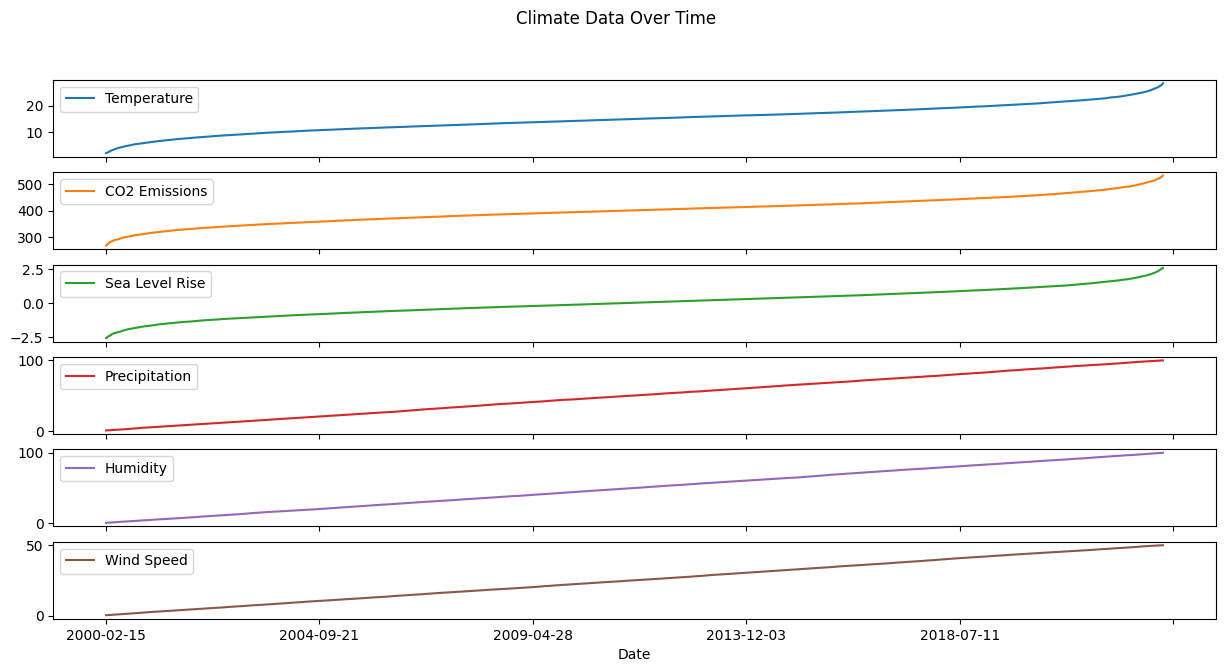

In [ ]:
# Setting 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting
gr = df.plot(figsize=(15, 7), subplots=True, title='Climate Data Over Time')

# Adjusting legend size for each subplot
for ax in gr:
    legend = ax.legend()
    if legend:
        legend.prop.set_size(14)
Ty
plt.show()

In [ ]:
df

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,,
2000-02-15,2.263400,269.431996,-2.583831,0.500851,0.463453,0.259097
2000-02-16,2.282272,270.637744,-2.569103,0.508246,0.465128,0.264789
2000-02-17,2.286275,270.902195,-2.565297,0.546088,0.475953,0.275347
2000-02-17,2.318023,271.183771,-2.561535,0.546522,0.478991,0.277389
2000-02-18,2.323526,271.689742,-2.553771,0.554189,0.492939,0.279569
...,...,...,...,...,...,...
2022-11-24,28.104269,529.386693,2.550681,99.612739,99.552094,49.786653
2022-11-24,28.169891,529.836649,2.553176,99.629081,99.553650,49.791675
2022-11-25,28.265915,529.911314,2.554735,99.642262,99.554856,49.798066


CORRELATION MATRIX

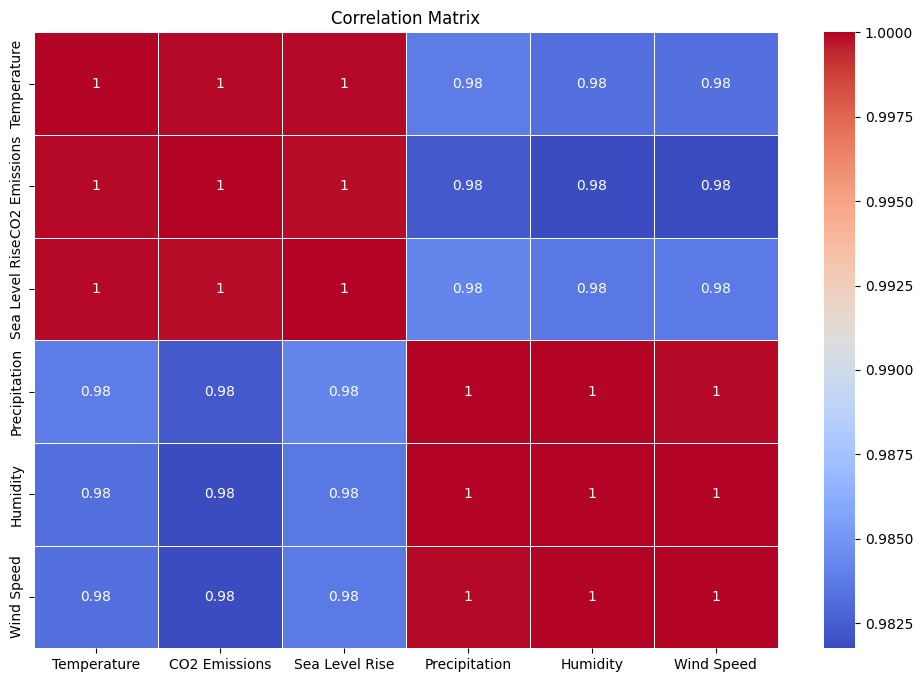

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

SELECTING FEATURES AND TARGET COLUMN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe
# Define the features and target variable if you have a target column
# For instance, if 'confidence' is your target variable:
X = df['Temperature']
y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]

In [ ]:
X

Date
2000-02-15     2.263400
2000-02-16     2.282272
2000-02-17     2.286275
2000-02-17     2.318023
2000-02-18     2.323526
                ...    
2022-11-24    28.104269
2022-11-24    28.169891
2022-11-25    28.265915
2022-11-26    28.293390
2022-11-27    28.296467
Name: Temperature, Length: 9906, dtype: float64

In [ ]:
y

,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,
2000-02-15,269.431996,-2.583831,0.500851,0.463453,0.259097
2000-02-16,270.637744,-2.569103,0.508246,0.465128,0.264789
2000-02-17,270.902195,-2.565297,0.546088,0.475953,0.275347
2000-02-17,271.183771,-2.561535,0.546522,0.478991,0.277389
2000-02-18,271.689742,-2.553771,0.554189,0.492939,0.279569
...,...,...,...,...,...
2022-11-24,529.386693,2.550681,99.612739,99.552094,49.786653
2022-11-24,529.836649,2.553176,99.629081,99.553650,49.791675
2022-11-25,529.911314,2.554735,99.642262,99.554856,49.798066


SPLITING THE DATASET INTO TRAINING AND TESTING

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you do not have a target variable and want to split the whole dataframe
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7924,)
X_test shape: (1982,)
y_train shape: (7924, 5)
y_test shape: (1982, 5)


In [ ]:
df

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,,
2000-02-15,2.263400,269.431996,-2.583831,0.500851,0.463453,0.259097
2000-02-16,2.282272,270.637744,-2.569103,0.508246,0.465128,0.264789
2000-02-17,2.286275,270.902195,-2.565297,0.546088,0.475953,0.275347
2000-02-17,2.318023,271.183771,-2.561535,0.546522,0.478991,0.277389
2000-02-18,2.323526,271.689742,-2.553771,0.554189,0.492939,0.279569
...,...,...,...,...,...,...
2022-11-24,28.104269,529.386693,2.550681,99.612739,99.552094,49.786653
2022-11-24,28.169891,529.836649,2.553176,99.629081,99.553650,49.791675
2022-11-25,28.265915,529.911314,2.554735,99.642262,99.554856,49.798066


# **APPLYING ALGORITHMS ON THE DATASET**

**1) APPLYING LSTM**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Extract features (X) and target (y)
# Make sure X is 2D, reshape if necessary
X = df['Temperature'].values.reshape(-1, 1)  # Reshape to 2D array
y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].values

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_out = LSTM(50, activation='relu')(inputs)
output = Dense(y_train.shape[1])(lstm_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

Epoch 1/20
124/124 - 3s - loss: 0.2021 - val_loss: 0.0830 - 3s/epoch - 23ms/step
Epoch 2/20
124/124 - 0s - loss: 0.0421 - val_loss: 0.0301 - 453ms/epoch - 4ms/step
Epoch 3/20
124/124 - 0s - loss: 0.0268 - val_loss: 0.0240 - 420ms/epoch - 3ms/step
Epoch 4/20
124/124 - 0s - loss: 0.0204 - val_loss: 0.0171 - 444ms/epoch - 4ms/step
Epoch 5/20
124/124 - 0s - loss: 0.0135 - val_loss: 0.0103 - 403ms/epoch - 3ms/step
Epoch 6/20
124/124 - 1s - loss: 0.0076 - val_loss: 0.0054 - 623ms/epoch - 5ms/step
Epoch 7/20
124/124 - 1s - loss: 0.0040 - val_loss: 0.0030 - 648ms/epoch - 5ms/step
Epoch 8/20
124/124 - 1s - loss: 0.0026 - val_loss: 0.0022 - 750ms/epoch - 6ms/step
Epoch 9/20
124/124 - 1s - loss: 0.0021 - val_loss: 0.0020 - 774ms/epoch - 6ms/step
Epoch 10/20
124/124 - 1s - loss: 0.0020 - val_loss: 0.0019 - 728ms/epoch - 6ms/step
Epoch 11/20
124/124 - 1s - loss: 0.0019 - val_loss: 0.0018 - 536ms/epoch - 4ms/step
Epoch 12/20
124/124 - 0s - loss: 0.0019 - val_loss: 0.0018 - 391ms/epoch - 3ms/step
Epo

EVALUATION METRICES

In [ ]:

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

62/62 [==============================] - 0s 2ms/step
R-squared value on test set: 0.9821159057980926
Mean Absolute Error on test set: 2.123096121615529
Mean Squared Error on test set: 12.563784835903885
Nash-Sutcliffe Efficiency on test set: 0.9994512233123567


TRAINING AND TESTING PERFORMANCE

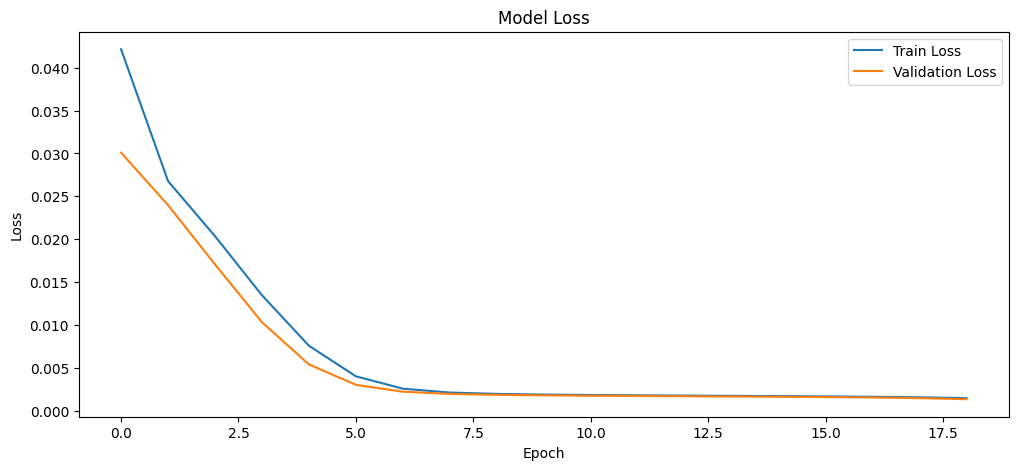

In [ ]:

# Plot training and validation loss values, skipping the first epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL EVALUATION GRAPH

R-squared value for CO2 Emissions: 0.9927116437273663
R-squared value for Sea Level Rise: 0.9938187122980755
R-squared value for Precipitation: 0.9751925843021535
R-squared value for Humidity: 0.9756800237501034
R-squared value for Wind Speed: 0.9731765649127646


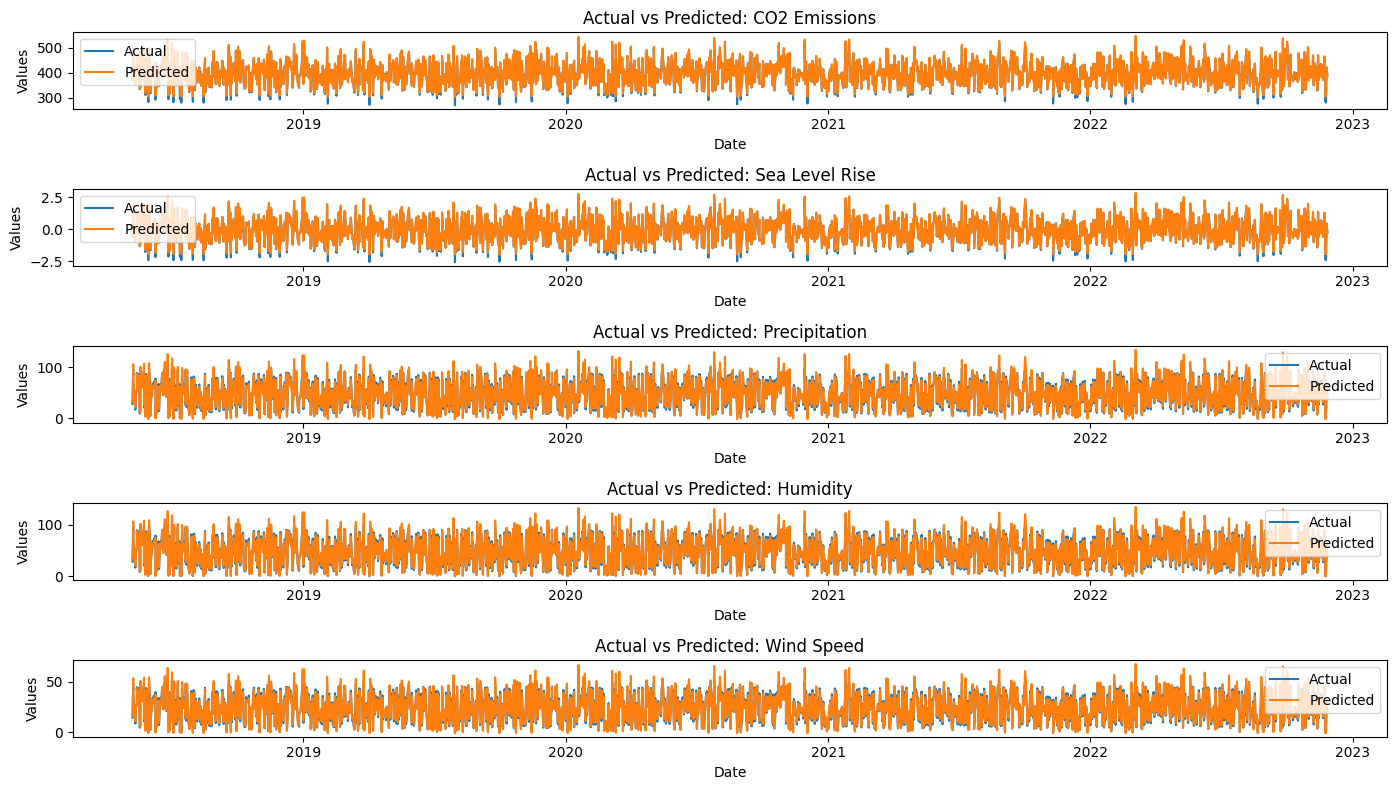

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Filter for dates between 2000 and 2022
filtered_dates_test = dates_test_series[(dates_test_series.year >= 2000) & (dates_test_series.year <= 2022)]

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range(n_features):
  # Combine dates, y_test, and y_pred into a DataFrame for easy handling
  df_plot = pd.DataFrame({
      'Date': filtered_dates_test,
      'Actual': y_test_inverse[:, i],
      'Predicted': y_pred_inverse[:, i]
  })

  # Calculate R-squared value
  r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
  print(f'R-squared value for {feature_names[i]}: {r2}')

  # Plot actual vs predicted values
  plt.subplot(n_features, 1, i + 1)
  plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
  plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
  plt.title(f'Actual vs Predicted: {feature_names[i]}')
  plt.xlabel('Date')
  plt.ylabel('Values')
  plt.legend()

  # Formatting the x-axis for dates
  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


**2) APPLYING GRU**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, timesteps, features] for GRU
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the GRU model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
gru_out = GRU(50, activation='relu')(inputs)
output = Dense(y_train.shape[1])(gru_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

Epoch 1/20
124/124 - 3s - loss: 0.1625 - val_loss: 0.0385 - 3s/epoch - 24ms/step
Epoch 2/20
124/124 - 1s - loss: 0.0317 - val_loss: 0.0280 - 585ms/epoch - 5ms/step
Epoch 3/20
124/124 - 1s - loss: 0.0238 - val_loss: 0.0196 - 595ms/epoch - 5ms/step
Epoch 4/20
124/124 - 1s - loss: 0.0152 - val_loss: 0.0111 - 653ms/epoch - 5ms/step
Epoch 5/20
124/124 - 1s - loss: 0.0077 - val_loss: 0.0050 - 914ms/epoch - 7ms/step
Epoch 6/20
124/124 - 1s - loss: 0.0034 - val_loss: 0.0023 - 639ms/epoch - 5ms/step
Epoch 7/20
124/124 - 1s - loss: 0.0019 - val_loss: 0.0016 - 693ms/epoch - 6ms/step
Epoch 8/20
124/124 - 1s - loss: 0.0015 - val_loss: 0.0014 - 922ms/epoch - 7ms/step
Epoch 9/20
124/124 - 1s - loss: 0.0014 - val_loss: 0.0014 - 1s/epoch - 10ms/step
Epoch 10/20
124/124 - 1s - loss: 0.0014 - val_loss: 0.0013 - 1s/epoch - 9ms/step
Epoch 11/20
124/124 - 1s - loss: 0.0014 - val_loss: 0.0013 - 960ms/epoch - 8ms/step
Epoch 12/20
124/124 - 1s - loss: 0.0014 - val_loss: 0.0013 - 563ms/epoch - 5ms/step
Epoch 13

EVUALTION METRICES

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

62/62 [==============================] - 0s 2ms/step
R-squared value on test set: 0.9856533606656288
Mean Absolute Error on test set: 1.7854419566506874
Mean Squared Error on test set: 9.721245685627633
Nash-Sutcliffe Efficiency on test set: 0.9995753832880137


TRAINING AND TESTING PERFORMANCE

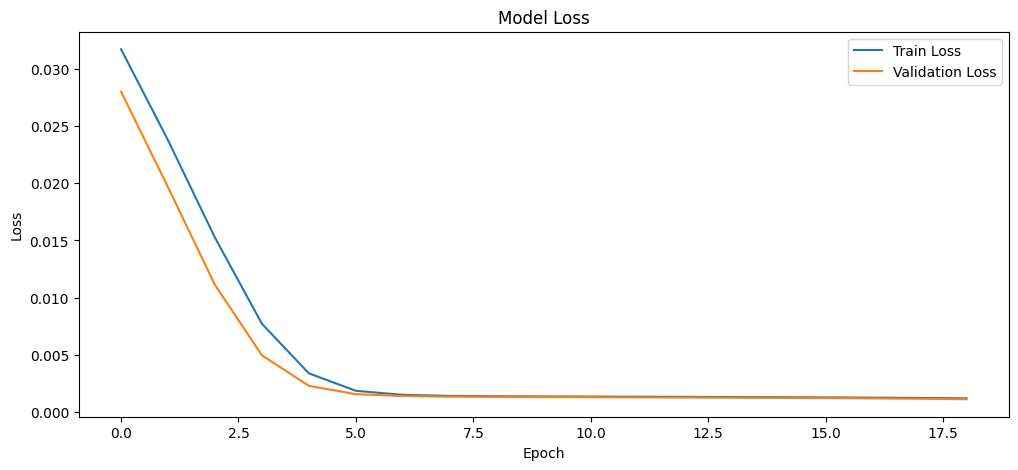

In [ ]:

# Plot training and validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL EVALUATION GRAPH

R-squared value for CO2 Emissions: 0.9962025531661305
R-squared value for Sea Level Rise: 0.9965519877483714
R-squared value for Precipitation: 0.9784371441750367
R-squared value for Humidity: 0.9785353860309534
R-squared value for Wind Speed: 0.9785397322076521


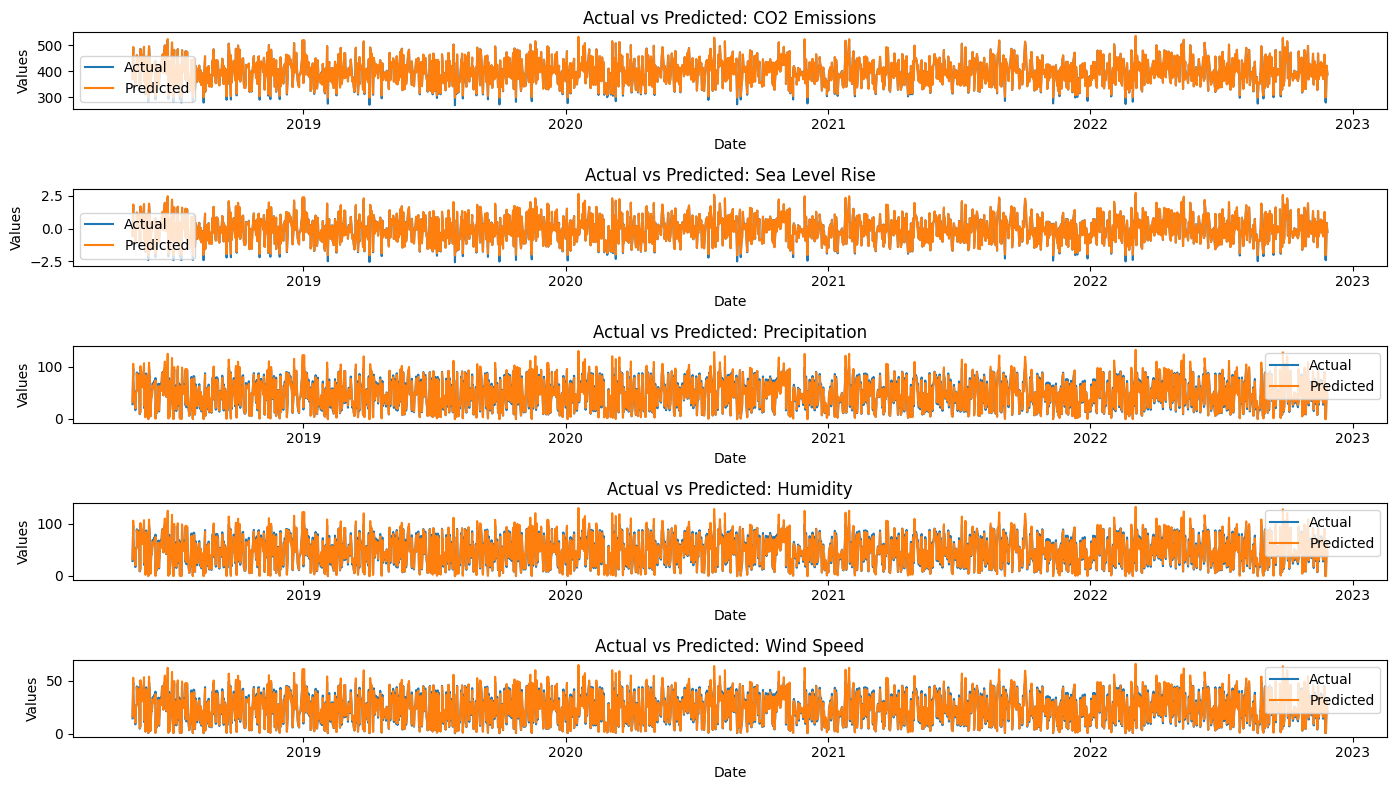

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range cg(n_features):
    # Combine dates, y_test, and y_pred into a DataFrame for easy handling
    df_plot = pd.DataFrame({
        'Date': dates_test_series,
        'Actual': y_test_inverse[:, i],
        'Predicted': y_pred_inverse[:, i]
    })

    # Calculate R-squared value
    r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
    print(f'R-squared value for {feature_names[i]}: {r2}')

    # Plot actual vs predicted values
    plt.subplot(n_features, 1, i + 1)
    plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
    plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
    plt.title(f'Actual vs Predicted: {feature_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()

    # Formatting the x-axis for dates
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

**3) APPLYING ANN**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/20
124/124 - 1s - loss: 0.1044 - val_loss: 0.0191 - 1s/epoch - 9ms/step
Epoch 2/20
124/124 - 0s - loss: 0.0100 - val_loss: 0.0027 - 331ms/epoch - 3ms/step
Epoch 3/20
124/124 - 0s - loss: 9.1254e-04 - val_loss: 4.5800e-04 - 303ms/epoch - 2ms/step
Epoch 4/20
124/124 - 0s - loss: 3.7671e-04 - val_loss: 3.7000e-04 - 301ms/epoch - 2ms/step
Epoch 5/20
124/124 - 0s - loss: 3.1800e-04 - val_loss: 3.1913e-04 - 319ms/epoch - 3ms/step
Epoch 6/20
124/124 - 0s - loss: 2.7671e-04 - val_loss: 2.7529e-04 - 306ms/epoch - 2ms/step
Epoch 7/20
124/124 - 0s - loss: 2.4029e-04 - val_loss: 2.3634e-04 - 313ms/epoch - 3ms/step
Epoch 8/20
124/124 - 0s - loss: 2.0808e-04 - val_loss: 2.0250e-04 - 316ms/epoch - 3ms/step
Epoch 9/20
124/124 - 0s - loss: 1.8072e-04 - val_loss: 1.7401e-04 - 290ms/epoch - 2ms/step
Epoch 10/20
124/124 - 0s - loss: 1.5861e-04 - val_loss: 1.5153e-04 - 314ms/epoch - 3ms/step
Epoch 11/20
124/124 - 0s - loss: 1.4130e-04 - val_loss: 1.3432e-04 - 343ms/epoch - 3ms/step
Epoch 12/20
124/

EVALUATION METRICES

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

62/62 [==============================] - 0s 2ms/step
R-squared value on test set: 0.9990379725959924
Mean Absolute Error on test set: 0.40850942873379203
Mean Squared Error on test set: 0.8361819925733895
Nash-Sutcliffe Efficiency on test set: 0.999963476198443


TRAINING AND TESTING PERFORMANCE

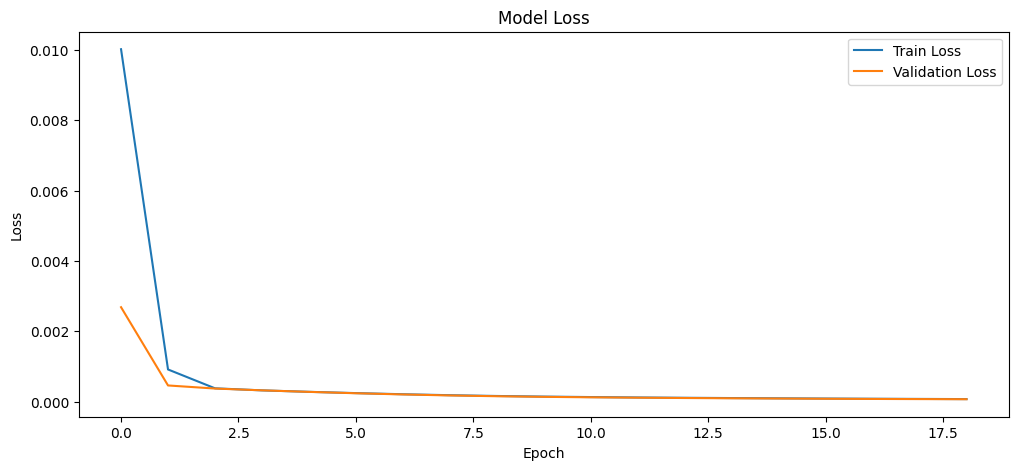

In [ ]:
# Plot training and validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL EVALUATION GRAPH

R-squared value for CO2 Emissions: 0.9991159736007019
R-squared value for Sea Level Rise: 0.9994515118359762
R-squared value for Precipitation: 0.9984799031420523
R-squared value for Humidity: 0.9991880113749717
R-squared value for Wind Speed: 0.99895446302626


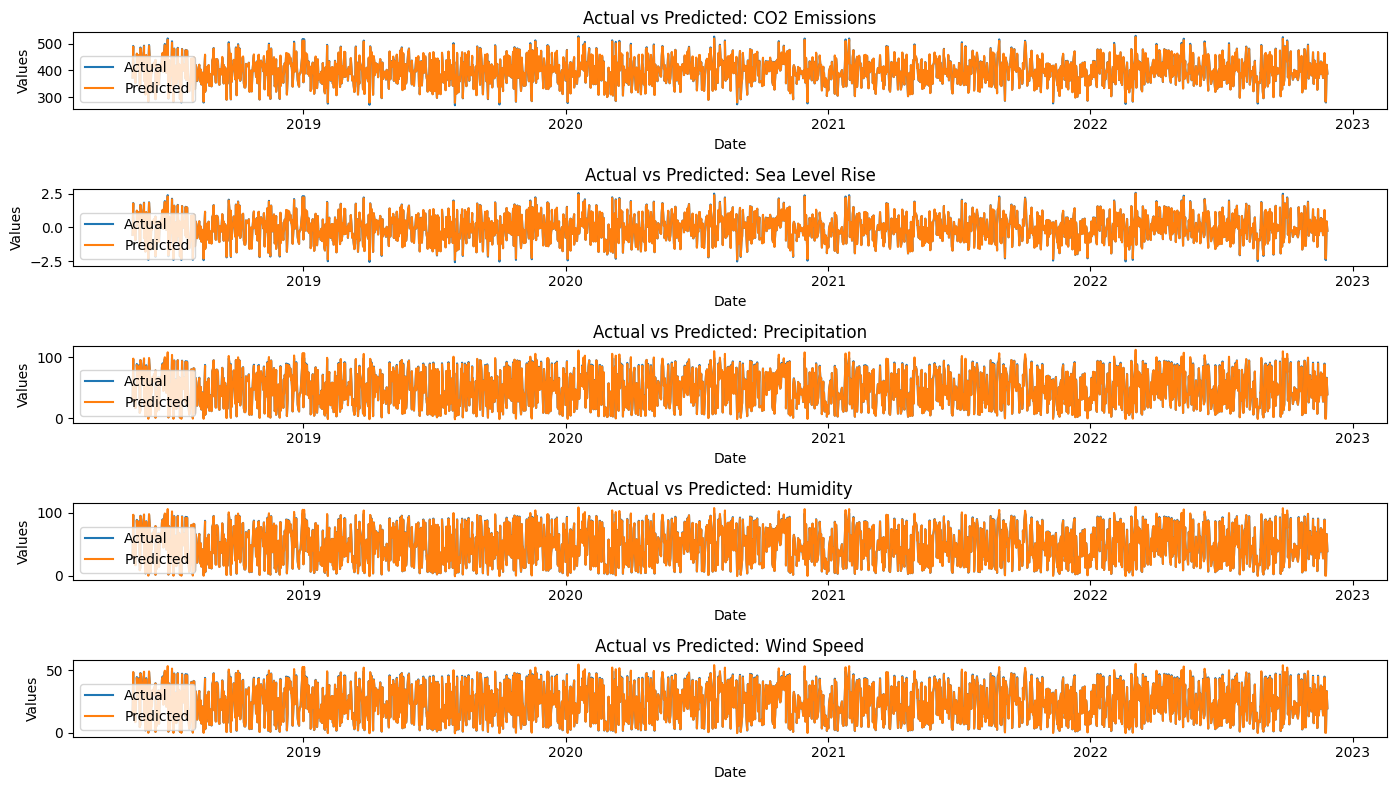

In [ ]:
# Plotting actual vs predicted values
dates_test = df.index[-len(X_test):]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range(n_features):
    # Combine dates, y_test, and y_pred into a DataFrame for easy handling
    df_plot = pd.DataFrame({
        'Date': dates_test_series,
        'Actual': y_test_inverse[:, i],
        'Predicted': y_pred_inverse[:, i]
    })

    # Calculate R-squared value
    r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
    print(f'R-squared value for {feature_names[i]}: {r2}')

    # Plot actual vs predicted values
    plt.subplot(n_features, 1, i + 1)
    plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
    plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
    plt.title(f'Actual vs Predicted: {feature_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()

    # Formatting the x-axis for dates
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()
